# Project: Reasons for success and failure in the movie industry

## Table of Contents
<ul>
<li><a href="#business">Business Understanding</a></li>
<li><a href="#dataunderstanding">Data Understanding</a></li>
<li><a href="#prepare">Prepare Data</a></li>
<li><a href="#modeling">Modeling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



## Introduction

> Success in any film production business requires great potential, especially in light of competition from major companies with long experience.Choosing the content for the audience’s desire remains the first of the basics, as diversity in films, whether Funny, social, historical, etc. has its own audience.

> Perhaps the success of the drama is due to many factors, including excitement, photography and the content of the story, in addition to employing the talents required. Therefore, we see films at the top that generate revenues and films at the bottom that do not achieve anything. In this study, we analyze data on the revenues of films most interested and compare production success in the film industry.

## CRISP-DM Process

> There is already a common process used to find many solutions in data science. This process is known as CRISP-DM and it has six stages.

> In working with missing values, categorical variables, and building out your model, it was probably easy to lose sight of the big picture of the process.

## 1. Business Understanding

how do movie studios decide which films to place their bets on? Are there common factors, such as the duration of the show, gender, staffing, social style of the audience, or production budget, that explain the financial success of a movie in relation to another? And based on this is determined the desire of the public? Are there common factors, such as revenue (views), voting, gender, or year? This question forms the basis of this research project. This question forms the basis of this research project. To answer that

A comparison of budget for modern and traditional films? 

Which companies have big capital and generate revenues? And companies that do not generate significant revenues? 

How do you rate the most interesting and popular films? 

Determine the best movie, why did he achieve revenue in all years? 

And the best films that have achieved revenues for each year? 

In [55]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## 2. Data Understanding

In [56]:
# Load dataset
df = pd.read_csv('tmdb-movies.csv')

**1.** Provide the number of rows and columns in this dataset.

In [57]:
# We solved this one for you by providing the number of rows and columns:
# You can see how we are prompted that we solved for the number of rows and cols correctly!

num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

print(num_rows, num_cols) 

10866 21


**2.** Quick look at the columns in the data set.

In [58]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

**3.** Which columns had no missing values? Provide a set of column names that have no missing values.

In [59]:
no_nulls = set(df.columns[df.isnull().mean()==0])#Provide a set of columns with 0 missing values.
no_nulls

{'budget',
 'budget_adj',
 'id',
 'original_title',
 'popularity',
 'release_date',
 'release_year',
 'revenue',
 'revenue_adj',
 'runtime',
 'vote_average',
 'vote_count'}

**4.** Which columns have the most missing values?

In [60]:
# missing values of columns 
df.isnull().mean()

id                      0.000000
imdb_id                 0.000920
popularity              0.000000
budget                  0.000000
revenue                 0.000000
original_title          0.000000
cast                    0.006994
homepage                0.729799
director                0.004049
tagline                 0.259893
keywords                0.137401
overview                0.000368
runtime                 0.000000
genres                  0.002117
production_companies    0.094791
release_date            0.000000
vote_count              0.000000
vote_average            0.000000
release_year            0.000000
budget_adj              0.000000
revenue_adj             0.000000
dtype: float64

**5.** the number of columns with no missing values

In [61]:
np.sum(np.sum(df.isnull())/df.shape[0] == 0)# Cell for your work here

12

**6.** Provide a set of column names that have more than 50% if their values missing.

In [62]:
# the columns with more than half of the column missing
set(df.columns[df.isnull().mean() > 0.50])

{'homepage'}

**7.** columns that are Quantitative and Categorical in nature

In [63]:
# columns that are quantitative in nature
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [64]:
# columns that are categorical in nature
cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe - should be 147
cat_df.shape[1]

11

In [65]:
cat_df.head(1)

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
0,tt0369610,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15


**8.** What kind of films are most popularity?

In [66]:
df.genres.value_counts()[:20]

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         90
Crime|Drama|Thriller     81
Crime|Drama              74
Comedy|Horror            72
Drama|Comedy|Romance     64
Action                   63
Name: genres, dtype: int64

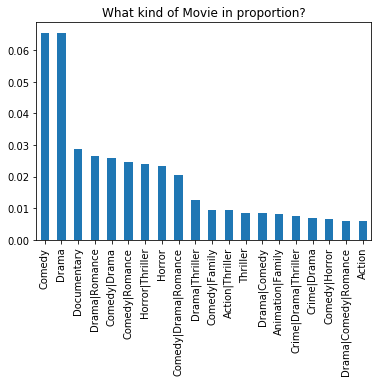

In [67]:
type_moive = df.genres.value_counts()[:20]#Provide a pandas series of the counts for each genres movies

# The below should be a bar chart of the proportion of individuals in each genres category if your type_moive
# is set up correctly.

(type_moive/df.shape[0]).plot(kind="bar");
plt.title("What kind of Movie in proportion?");

In [68]:
# kind of films are most popularity
pd.DataFrame(df.groupby(['genres']).mean()['popularity'].sort_values(ascending=False))[:20]

,popularity
genres,
Adventure|Science Fiction|Thriller,13.112507
Adventure|Drama|Science Fiction,12.699699
Science Fiction|Adventure|Thriller,10.739009
Action|Thriller|Science Fiction|Mystery|Adventure,9.363643
Western|Drama|Adventure|Thriller,9.110700
Adventure|Family|Animation|Action|Comedy,8.691294
Science Fiction|Action|Thriller|Adventure,8.654359
Action|Animation|Horror,8.411577
History|Drama|Thriller|War,8.110711


In [69]:
from collections import defaultdict
look_for = ["Drama", "Comedy", 
                 "Documentary", "Romance", "Thriller",
                 "Horror", "Family", "Animation",
                 "Crime", "Adventure",
                 "Science Fiction", "Action", "Mystery",
                "Western","History","War","Fantasy"]
new_df = defaultdict(int)
for val in look_for:
    for idx in range(df.shape[0]):
        if str(df['genres'][idx]) != "nan":
            if val in df['genres'][idx]:
                if val in df['genres'][idx]:
                    new_df[val] += int(df['popularity'][idx])
new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
new_df.columns = ['genres', 'popularity']
new_df.sort_values('popularity', ascending=False, inplace=True)
new_df

,genres,popularity
11,Action,1239
9,Adventure,1078
0,Drama,1006
4,Thriller,985
1,Comedy,822
10,Science Fiction,747
16,Fantasy,537
6,Family,470
8,Crime,440
3,Romance,361


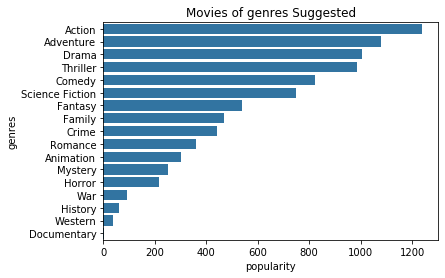

In [70]:
base_color = sb.color_palette()[0]
sb.barplot(data = new_df, x = 'popularity', y = 'genres', color = base_color)
plt.title("Movies of genres Suggested")
plt.show();

## 3. Prepare Data
The next step is to gather information and organize it in a way that allows us to answer questions.

**1.** drop many variables

In [71]:
# drop many variables
df.drop(['id','imdb_id','original_title','cast','homepage','tagline','keywords','overview','release_date','vote_average','budget_adj','revenue_adj'], axis = 1, inplace = True)
# Quick look at the columns in the data set
df.columns

Index(['popularity', 'budget', 'revenue', 'director', 'runtime', 'genres',
       'production_companies', 'vote_count', 'release_year'],
      dtype='object')

**2.** Checking the columns 'budget', 'revenue', and 'runtime' for 0 values

In [72]:
print(df.query('budget == 0').budget.count())
print(df.query('revenue == 0').revenue.count())
print(df.query('runtime == 0').runtime.count())

5696
6016
31


In [73]:
# dropping 0 value in revenue,runtime and budget column
# Because films without a budget also have no revenue and do not have a show time in the column

col_list = ['budget', 'revenue', 'runtime']
df[col_list] = df[col_list].replace(0, np.NAN) # replacing '0' value to NAN 

#dropping NaN value in col_list 
df.dropna(subset = col_list, inplace = True)

**3.** Dropping duplicates

Eliminating duplicates will not be identical to two movie at all

In [74]:
sum(df.duplicated())

1

In [75]:
df.drop_duplicates(inplace=True)

In [76]:
sum(df.duplicated())

0

**4.** Change the data type the revenue and budget column.

In [77]:
list_datatype=['budget', 'revenue']
df[list_datatype]=df[list_datatype].applymap(np.int64)

In [78]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
director                 object
runtime                 float64
genres                   object
production_companies     object
vote_count                int64
release_year              int64
dtype: object

### 4. Answer Questions base on dataset

**Question 1: Comparing modern and traditional movies in the last ten years?**

Our study group that contains 10,866 films that were released worldwide in the years (1966-2015) Given the large number of data samples from movie releases and in order to determine the variables that determine the success of the most popular films, we chose the dataset for years instead of Films every year where five years of forty-nine years (2011-2015) were chosen to represent modern films and five years of forty-nine years (2005-2010) were chosen to represent traditional films and were combined into one large unorganized dataset. This method proved an effective way to answer the research question as it focused on the most profitable films and tried to explain their success, rather than finding similarities between random films that are too small and too big, something that might happen if films were chosen each year randomly and variable data was obtained

In [79]:
df_15 = df[(df['release_year'] >= 2011) & (df['release_year'] <= 2015)]
df_05 = df[(df['release_year'] >= 2005) & (df['release_year'] <= 2010)]

In [80]:
# the number of movies with years range
print(df_05.shape[0])
print(df_15.shape[0])

1016
862


In [81]:
df_05.describe().revenue

count    1.016000e+03
mean     1.109685e+08
std      1.868657e+08
min      3.000000e+00
25%      1.231831e+07
50%      4.791468e+07
75%      1.228296e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [82]:
df_15.describe().revenue

count    8.620000e+02
mean     1.417822e+08
std      2.322957e+08
min      1.100000e+01
25%      1.113568e+07
50%      5.474676e+07
75%      1.597275e+08
max      2.068178e+09
Name: revenue, dtype: float64

> Through the results it was found that traditional films achieved higher revenues than modern films as a result of the following: Through an average study where the best movies achieved the highest revenue is 2.781506e+09 while the lowest real revenue is 3.000000e+00 and on that the data set of the traditional films was chosen to know the factors That contributed to success

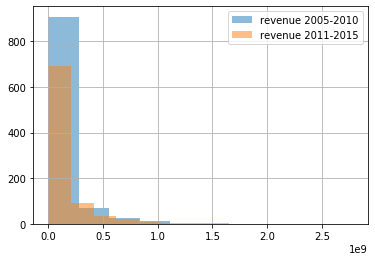

In [83]:
df_05.revenue.hist(alpha=0.5,label='revenue 2005-2010')
df_15.revenue.hist(alpha=0.5,label='revenue 2011-2015');
plt.legend();

**Question 2: How do movie studios decide which films to place their bets on?**

> Are there common factors, such as the duration of the show, gender, staffing, social style of the audience, or production budget, that explain the financial success of a movie in relation to another?

In [84]:
df.describe().revenue

count    3.854000e+03
mean     1.076866e+08
std      1.765393e+08
min      2.000000e+00
25%      1.360003e+07
50%      4.480000e+07
75%      1.242125e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [85]:
high_revenue = df.revenue>=1.242125e+08
mid_revenue = (df.revenue >= 4.480000e+07) & (df.revenue <= 1.242125e+08)
lower_revenue = (df.revenue >= 1.360003e+07) & (df.revenue <= 4.480000e+07)

**factor budget relating revenue**

In [86]:
df.budget[high_revenue].mean()

79037022.82572614

In [87]:
df.budget[mid_revenue].mean()

35290363.588785045

In [88]:
df.budget[lower_revenue].mean()

22162921.13603323

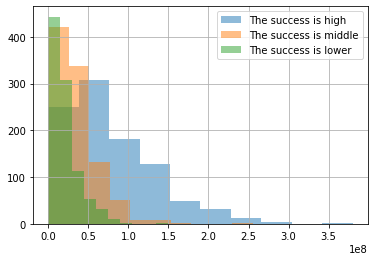

In [89]:
df.budget[high_revenue].hist(label='The success is high',alpha=0.5)
df.budget[mid_revenue].hist(label='The success is middle',alpha=0.5)
df.budget[lower_revenue].hist(label='The success is lower',alpha=0.5);
plt.legend();

The big companies that have big capital for making films make big revenues, while the companies that don't have a big budget make small revenues

**factor runtime relating revenue**

In [90]:
df.runtime[high_revenue].mean()

116.18879668049793

In [91]:
df.runtime[mid_revenue].mean()

109.9491173416407

In [92]:
df.runtime[lower_revenue].mean()

106.84008307372794

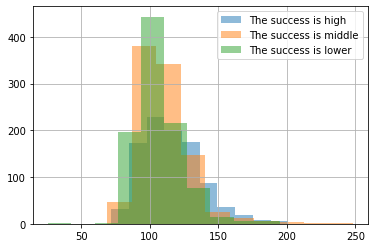

In [93]:
df.runtime[high_revenue].hist(label='The success is high',alpha=0.5)
df.runtime[mid_revenue].hist(label='The success is middle',alpha=0.5)
df.runtime[lower_revenue].hist(label='The success is lower',alpha=0.5);
plt.legend();

Among the success factors for the industry, films are the show duration, that is, the longer the show, the more revenue, and the less the offer, the less revenue

**factor vote count relating revenue**

In [94]:
df.vote_count[high_revenue].mean()

1348.7510373443984

In [95]:
df.vote_count[mid_revenue].mean()

426.3738317757009

In [96]:
df.vote_count[lower_revenue].mean()

223.42056074766356

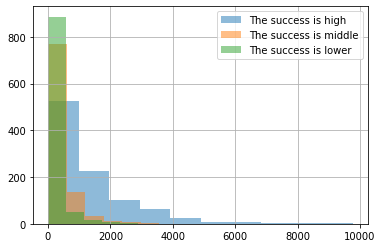

In [97]:
df.vote_count[high_revenue].hist(label='The success is high',alpha=0.5)
df.vote_count[mid_revenue].hist(label='The success is middle',alpha=0.5)
df.vote_count[lower_revenue].hist(label='The success is lower',alpha=0.5);
plt.legend();

Likewise, the voting component increases the more votes, the more revenue, and the lower the percentage of voting, the less revenue

**Question 3: What is the best so I have not achieved revenue in all years?**

In order to analyze the reasons for the success of these movies, some questions are asked here: What is the best so I have not achieved revenue in all years? The best movies that have earned revenue for each year?

In [98]:
df.revenue.max()

2781505847

By examining the number of movies per year and by checking the best films that make money from ten years ago

In [99]:
df.groupby('release_year').revenue.max().reset_index()

,release_year,revenue
0,1960,60000000
1,1961,215880014
2,1962,70000000
3,1963,78898765
4,1964,124900000
5,1965,163214286
6,1966,33736689
7,1967,205843612
8,1968,56715371
9,1969,102308889


 ## 5. Modeling Data and Measure Performance

In [100]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    y = df['revenue']
    
    #Drop respondent and expected salary columns
    df = df.drop(['director', 'production_companies','revenue'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        #The remaining rows with missing values fill with mean
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

The best thing about the fitting of our test data is to perform this function find_optimal_lm_mod

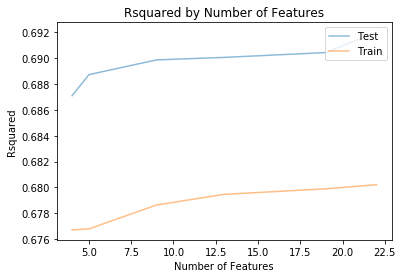

In [102]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In fact, this plot is a very common pattern in R-squared. You can see, the higher the number of features, it improves somewhat and the test data starts to rise. In fact, if I decrease 25 to 9 what I saw is a big decrease in the test data.

The best way to know the advantages of X in our model is to look at the weight of their coefficients. 

In [103]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
11,genres_Comedy|Romance,4.292694e+07,4.292694e+07
16,genres_Drama|Crime,-3.551272e+07,3.551272e+07
10,genres_Comedy|Family,3.318957e+07,3.318957e+07
9,genres_Comedy|Drama|Romance,2.434151e+07,2.434151e+07
20,genres_Horror,1.929695e+07,1.929695e+07
7,genres_Comedy,1.809110e+07,1.809110e+07
21,genres_Horror|Thriller,1.582280e+07,1.582280e+07
18,genres_Drama|Romance,1.437987e+07,1.437987e+07
13,genres_Crime|Drama|Thriller,-1.158503e+07,1.158503e+07
15,genres_Drama|Comedy,1.047191e+07,1.047191e+07


You can only look at the coefficient size. The size of negative and positive coefficients is related to the direction. The directional effect on the response associated with this particular variable.The coefficient size is basically an effect even after normalize, so you can see that some types of movies are a very influential element in addition to popularity and voting, but it is not that the higher the type of films the higher the effect is, so they are not directly related to this model and you will also notice that wherever it is Production of movies for a specific type directly determines the amount of what the movie achieves, so there are certain types where it is better than other types. It appears that these two are the two largest indicators.

## Conclusions

> Modern filmmaking, which is worth nearly 10 billion dolar a year, is a noisy business and highly profitable There was an important theoretical relationship between the number of revenues and the amount of money the film studio spent in producing the film

> The variable was recorded as analyzes indicate a large variation in movie revenue, with approximately 80% -85% of total movie revenue coming from the best 20% of movies. The film that is a supplement or belongs to a well-established property will have an impact on competition in the release year. As the release year affects films evaluation

> By identifying the big companies that have modern equipment and have big capital for the film industry, they achieve great revenues, while the average companies achieve small revenues and accordingly we can find out the reasons for the success of these companies or the failure of other companies.

> In the event that success is achieved for a previous movie in the series, the company will strive to produce successful and profitable films in the coming days, because success will be followed by other successes and whoever succeeds in one of the works does not accept failure in other works, and all of this will result in increasing the different audiences. There is no specific work for success, as we found in the analysis that it is difficult to divide success according to the type of film in the study: action (ACTION), science fiction (SCIFI), comedy (COM), documentary (DOC), foreign (FOREIGN), romance (ROM), adventure (ADVENT) and horror (HORROR). Therefore, it is difficult to evaluate the database according to gender, and there are other factors that affect the popularity of films, such as music, photography, award nominations, and the strength of stars, which were important positive determinants of success.

> Voting clearly plays an important role in determining movie revenues, as some votes can say something about the nature of the movie and can restrict the film market.

> Another variable whose importance was questioned in the analysis but worthy of inclusion was a measure of the strength of the director and actor associated with a film project. It indicates that the analysis believes that the strength of the director and the star is important, which supports the assumption of rent picking that the actor has a market value through large salaries and does little to influence the profitability of films. And successful films may make the stars. Due to the ambiguity of the effect of this variable and the inconsistency of our qualifications

> Most of the time, we found that the strength of the directors, production budgets and sequences contributed positively to the film's revenue.

> Special effects and computer technology have come a long way in the past ten years, and may have contributed to changing consumers' tastes and preferences for certain types of movies.

> Better quality films will be more successful.

> If a movie is released in the holiday season, it is expected to see an increase in revenue, while the summer release will bring an expected increase in views.

> Comedies tend to experience positive success in the supply market, although the influence of other genres is inconclusive.
